In [1]:
import requests
from bs4 import BeautifulSoup
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
import nltk

### Best feature of Kitchen Tools (Kitchen & Dining bar)

In [7]:
url_ebay_kit = 'https://www.ebay.com/deals/home-garden/kitchen-dining-bar'

res_ebay_kit = requests.get(url_ebay_kit)
soup_ebay_kit = BeautifulSoup(res_ebay_kit.content, 'html.parser')
data_ebay_kit = soup_ebay_kit.find_all('span', {'itemprop':'name'})

print(url_ebay_kit)

https://www.ebay.com/deals/home-garden/kitchen-dining-bar


In [8]:
for item_ebay_kit in data_ebay_kit:
    print(item_ebay_kit.get_text())

Keurig K-Slim Single-Serve K-Cup Pod Coffee Maker - Black
Nostalgia Organic Fruit Snack Maker with Gummy Bear and Worm Candy Maker
New Kenwood Persona SJM610 54oz Variable Temperature Control Coffee & Tea Kettle
Nespresso Inissia Espresso Maker Machine and Coffee Capsules Pods Bundle
Hot Logic Mini Personal Portable Oven
Bella Vino Premium Crystal Glass Tannin Softening Elegant Wine Decanter
Mad Hungry Set of (3) 2-pc Silicone Spurtles with Gift Boxes  - Kitchen Gadgets
Sweet Home Collection 3-Piece Kitchen Sink Dish Drainer Set - Assorted Colors
Dumpling Maker Mold Mould Dough Press Wraper Set Meat Pie Empanada Kitchen Tool
Barbecue Aprons Adjustable Grill Grilling BBQ Funny Humor Kitchen Cooking Gifts
8pcs Measuring Cups Spoons Baking Cooking Kitchen Tools Set Stainless Steel + PP
RCA 1.2 Cu Ft Microwave with Air Fryer and Convection - Stainless Steel RMW1205
Lavazza BLUE Top Class Capsules [100/Case]
New Kimbo Decaffeinato Nespresso Compatible Compostable Espresso Pods - 100/box
Mis

In [9]:
item_list_ebay_kit = []

for item_ebay_kit in data_ebay_kit:
    items_ebay_kit = item_ebay_kit.get_text()
    item_list_ebay_kit.append(items_ebay_kit)           

str_itemlist_ebay_kit = str(item_list_ebay_kit)

tokenized_ebay_kit = nltk.word_tokenize(str_itemlist_ebay_kit)

word_dic_ebay_kit = {}

for word in tokenized_ebay_kit:
    if word not in word_dic_ebay_kit:
        word_dic_ebay_kit[word] = 1 # changed from "0" to "1"
    else:
        word_dic_ebay_kit[word] += 1
        
sorted_word_dic_ebay_kit = sorted(word_dic_ebay_kit.items(), key=lambda x:x[1], reverse=True)

for word, count in sorted_word_dic_ebay_kit[:50]:
    print("{0}({1})".format(word, count), end=" ")

,(23) '(20) Espresso(7) Kitchen(7) Maker(6) -(6) Set(5) Coffee(4) with(4) 'New(4) ``(4) Miscela(4) d'Oro(4) Medium(4) Roast(4) ''(4) and(3) Pods(3) 2.2lb(3) [(2) Black(2) Organic(2) Fruit(2) &(2) Capsules(2) Oven(2) Wine(2) Silicone(2) Dish(2) 'Dumpling(2) Mold(2) Mould(2) Dough(2) Press(2) Wraper(2) Empanada(2) Grill(2) Cooking(2) Baking(2) Stainless(2) Steel(2) Cu(2) Microwave(2) ](2) Decaffeinato(2) Whole(2) Bean(2) 'Keurig(1) K-Slim(1) Single-Serve(1) 

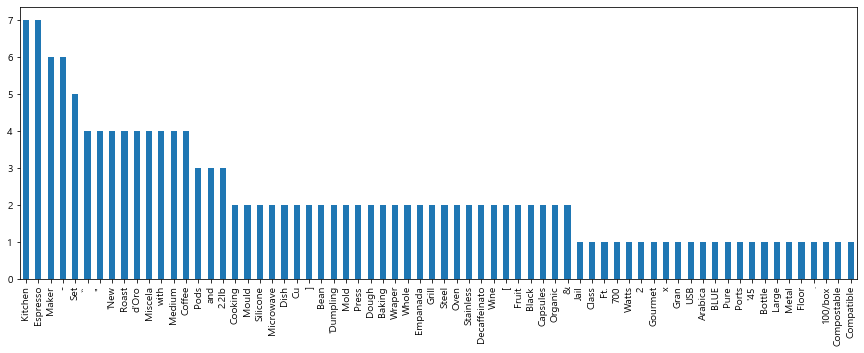

In [10]:
word_frequency_ebay_kit = nltk.FreqDist(word_dic_ebay_kit)

font_name = matplotlib.font_manager.FontProperties(fname="C:/Windows/Fonts/malgun.ttf").get_name() 
matplotlib.rc('font', family=font_name)

ebay_kit_df = pd.DataFrame(list(word_frequency_ebay_kit.values()), word_frequency_ebay_kit.keys())
result_ebay_kit = ebay_kit_df.sort_values([0], ascending=False)
result_ebay_kit[2:70].plot(kind='bar', legend=False, figsize=(15,5))
plt.show()